# Data Set Information:


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

In [1]:
import warnings
warnings.filterwarnings('ignore')#TO IGNORE WARNINGS
import pandas as pd 
mushroom = pd.read_csv('mushrooms.csv') #loading csv file 
print(mushroom.head(5))


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [2]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
mushroom.isnull().sum() #used to find null values 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


'poisonous to edible ratio'ratio : 0.93
npoisonus_cnt: 3916,edible_cnt: 4208


<AxesSubplot:title={'center':'class checking'}, xlabel='class', ylabel='count'>

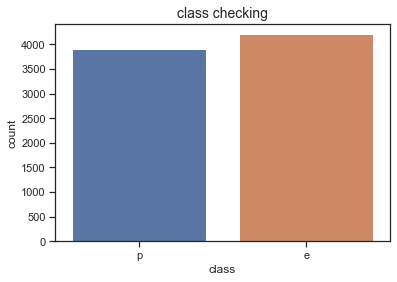

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

edible_cnt = mushroom[mushroom['class'] =='e']['class'].count()
poisonus_cnt = mushroom[mushroom['class'] =='p']['class'].count()
p_e_ratio = poisonus_cnt/float(edible_cnt)

print("\n'poisonous to edible ratio'ratio : {}\nnpoisonus_cnt: {},edible_cnt: {}"
      .format(p_e_ratio.round(2),poisonus_cnt,edible_cnt))
      
      
sns.set(style="ticks", color_codes=True)
plt.title("class checking",fontsize=14)
sns.countplot(x=mushroom["class"],data=mushroom)






In [5]:
#removing NA VALUES 

mushroom = mushroom.drop("veil-type",axis = 1)
mushroom.shape

(8124, 22)

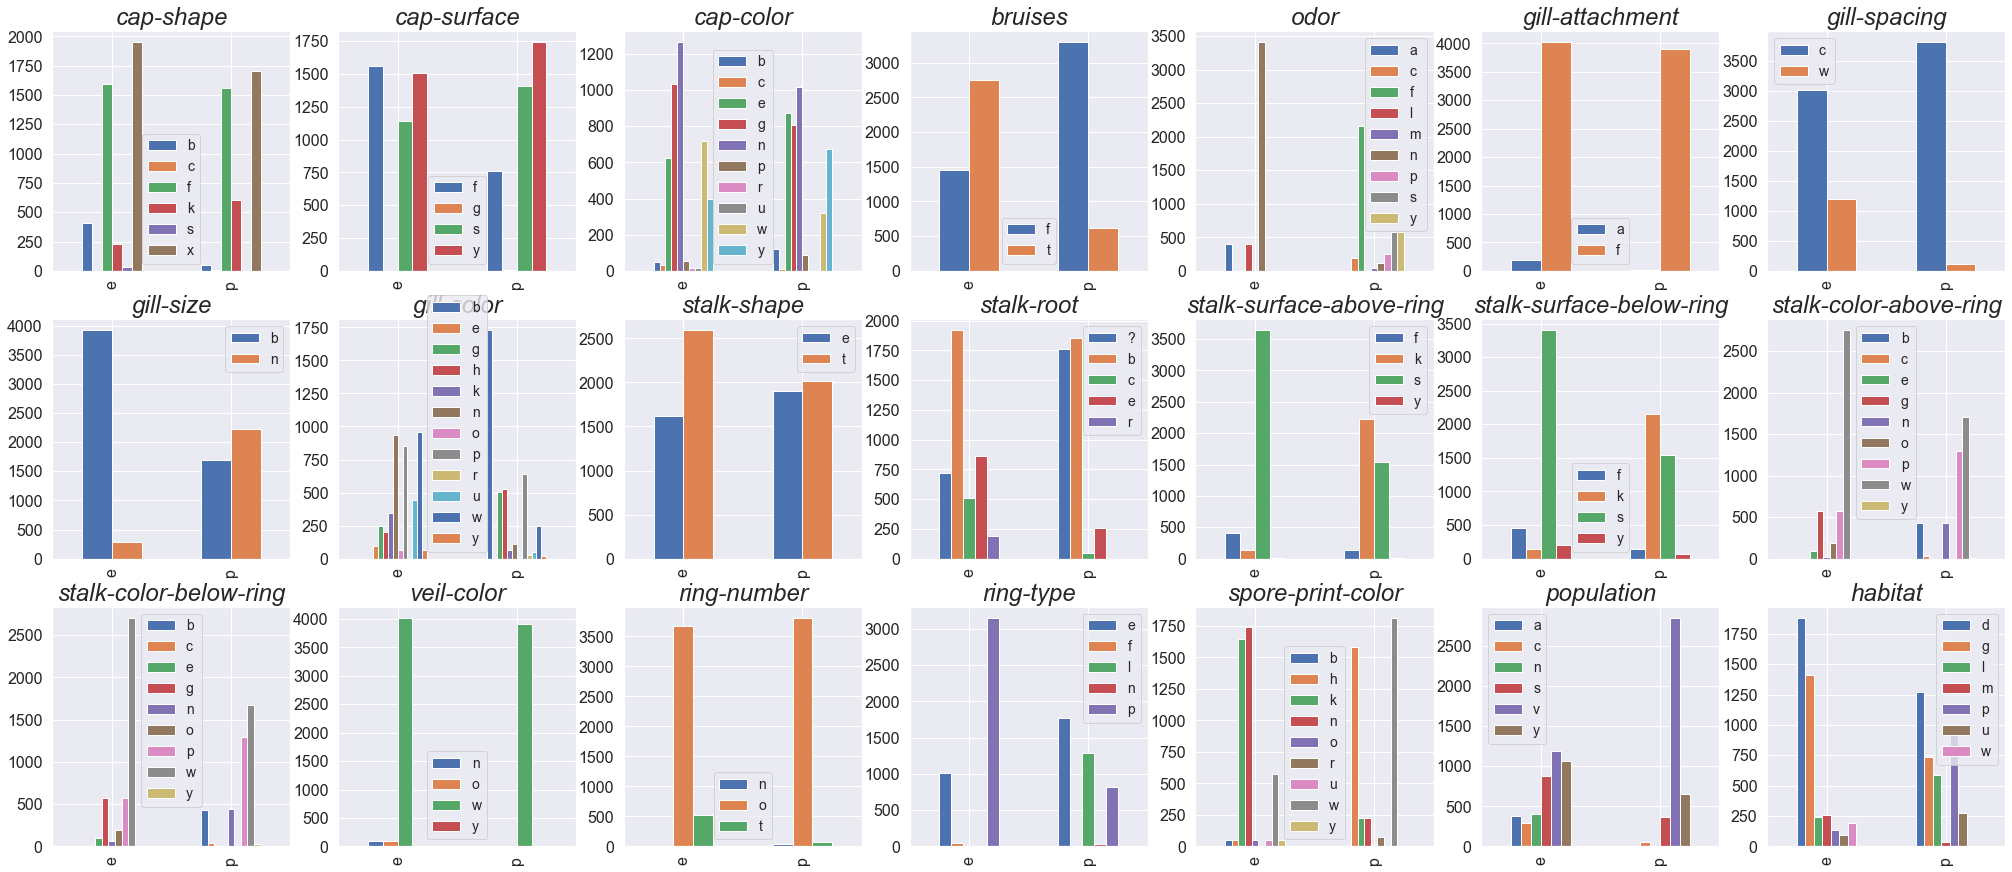

In [6]:
import numpy as np
feature_columns = mushroom.columns[1:]
sns.set(style="darkgrid",color_codes=True)
fig, axes = plt.subplots(nrows = 3,ncols=7,figsize=(35,15))
mushroom['id'] = np.arange(1,mushroom.shape[0] + 1)

for f, ax in zip (feature_columns,axes.ravel()):
    mushroom.groupby(['class',f])['id'].count().unstack(f).plot(kind='bar',ax=ax, legend=True ,grid = True,fontsize=16)
    ax.set_title(f,style="oblique",size=24)
    ax.set_xlabel('\n',style='italic',size=18)
    ax.legend(fontsize=14)
    
mushroom = mushroom.drop('id',axis = 1)
    

# with these graphs we can conclude many things like 
White Coloured and Bell Shaped Mushrooms are highly recommended for eating
Red Coloured Knobbed Shaped Mushrooms are poisonous
Odourless and Bruised Mushrooms are highly recommended for eating
Fishy Odour with No Bruises Mushrooms are poisonous

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mushroom = mushroom.apply(LabelEncoder().fit_transform)
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [8]:
mushroom.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


<AxesSubplot:>

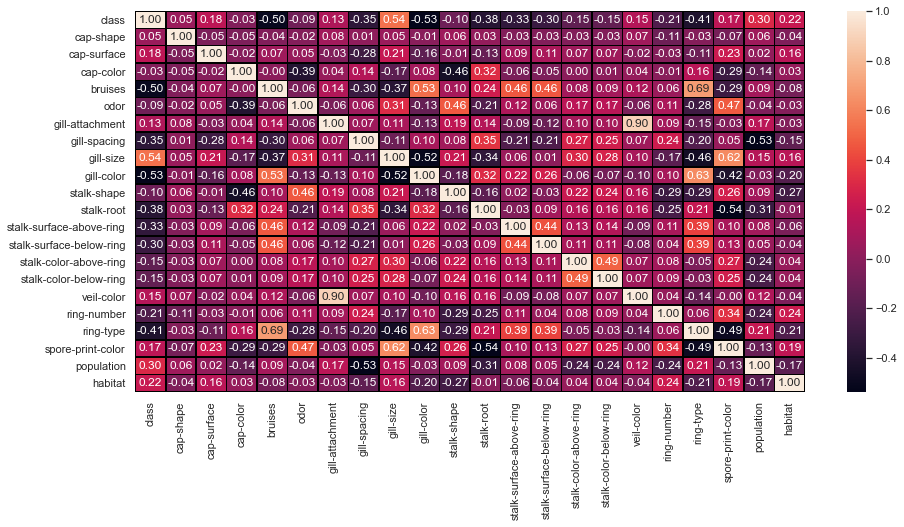

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(mushroom.corr(),annot=True, linewidths=0.5,linecolor="black",fmt=".2f")

In [10]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


<function matplotlib.pyplot.show(close=None, block=None)>

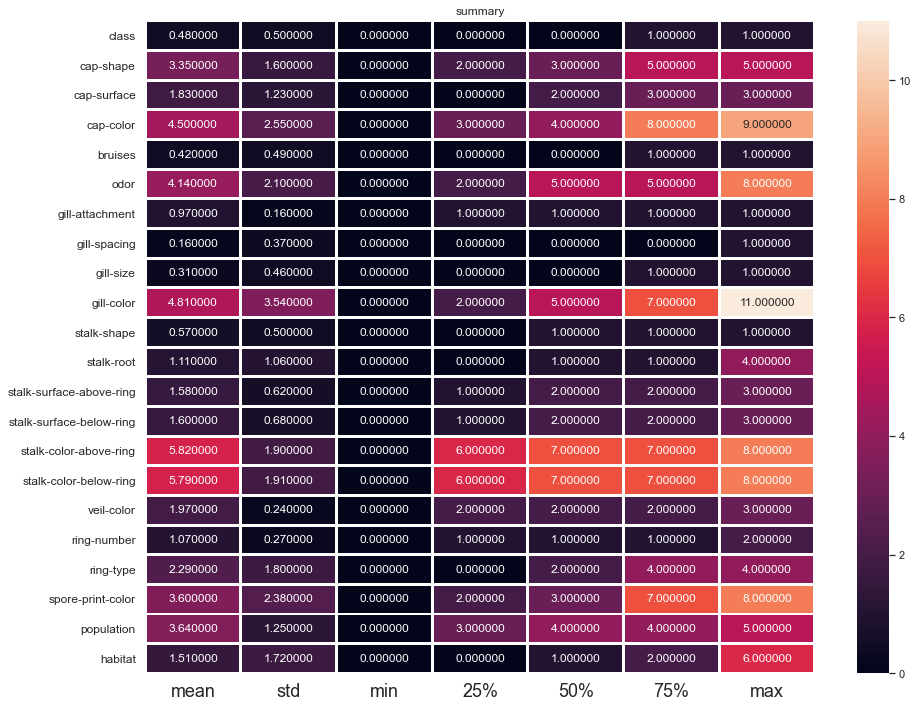

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(round(mushroom.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("summary")
plt.show

In [12]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

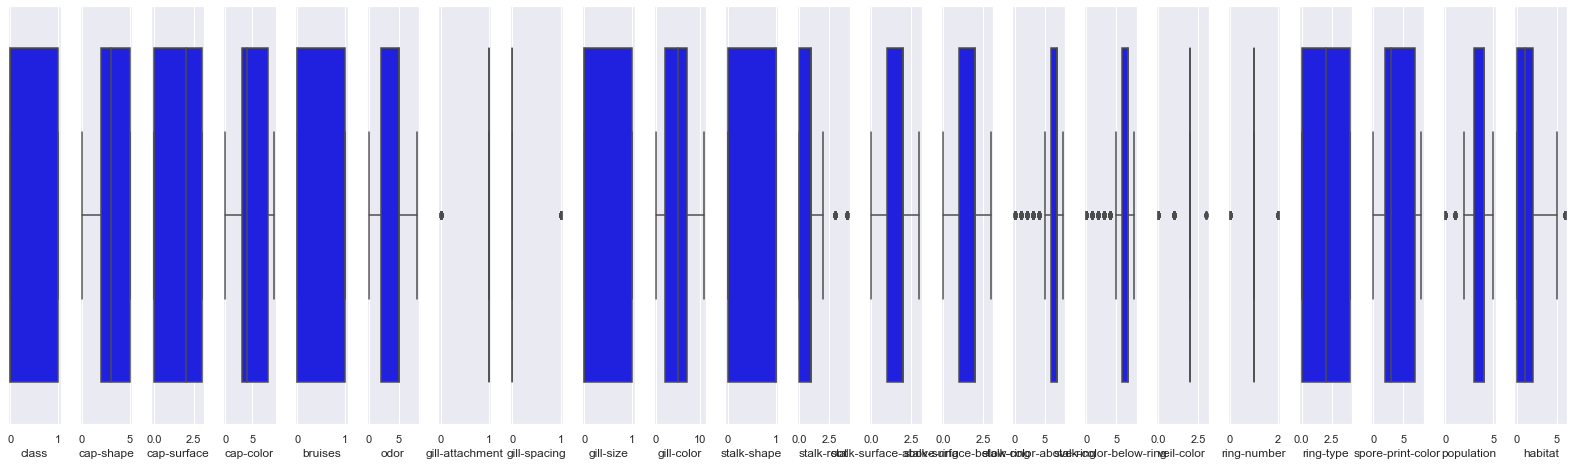

In [13]:
collist= mushroom.columns.values
ncol= 30
nrows=14
plt.figure(figsize=(ncol,3*ncol))



for i in range (0, len (collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(mushroom[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [14]:
mushroom.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of       class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1 

In [15]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(mushroom))
z.shape

(8124, 22)

In [16]:
threshold=3
print (np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [17]:
df_new=mushroom[(z<3).all(axis=1)]
print(mushroom.shape)
print(df_new.shape)

(8124, 22)
(6568, 22)


In [18]:
loss_percent=(8124-6568)/8124*100
print(loss_percent)

19.15312653865091


In [19]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [20]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [21]:
x

array([[ 1.06417458,  1.01538983,  0.01302353, ...,  0.91984586,
        -0.6053198 , -0.92292134],
       [-0.93969544,  1.01538983,  0.01302353, ...,  0.91984586,
         0.04144201, -1.62968315],
       [-0.93969544, -2.11647487,  0.01302353, ...,  0.91984586,
         0.04144201, -1.62968315],
       ...,
       [ 1.06417458, -0.28091648,  0.01302353, ..., -1.19928688,
         1.36797163,  0.10312786],
       [ 1.06417458, -0.28091648,  0.98826559, ..., -1.19928688,
         1.36797163,  0.10312786],
       [ 1.06417458, -0.28091648,  0.98826559, ..., -1.19928688,
         1.36797163,  0.10312786]])

In [22]:
from  sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.06417458,  1.01538983,  0.01302353, ...,  0.91984586,
        -0.6053198 , -0.92292134],
       [-0.93969544,  1.01538983,  0.01302353, ...,  0.91984586,
         0.04144201, -1.62968315],
       [-0.93969544, -2.11647487,  0.01302353, ...,  0.91984586,
         0.04144201, -1.62968315],
       ...,
       [ 1.06417458, -0.28091648,  0.01302353, ..., -1.19928688,
         1.36797163,  0.10312786],
       [ 1.06417458, -0.28091648,  0.98826559, ..., -1.19928688,
         1.36797163,  0.10312786],
       [ 1.06417458, -0.28091648,  0.98826559, ..., -1.19928688,
         1.36797163,  0.10312786]])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score

In [24]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round (accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("at random state",i,"the model performs very well")
        print("at random state:-",i)
        print("Training r2_score is:-",accuracy_score(y_train,pred_train)*100) 
        print("Training r2_score is:-",accuracy_score(y_test,pred_test)*100)

at random state 458 the model performs very well
at random state:- 458
Training r2_score is:- 67.11077274457557
Training r2_score is:- 67.12328767123287


In [25]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1000)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.41      0.46      0.43       555
           1       0.24      0.24      0.24       327
           2       0.11      0.18      0.13       113
           3       0.03      0.03      0.03        58
           4       0.23      0.04      0.06       187
           5       0.02      0.03      0.03        74

    accuracy                           0.28      1314
   macro avg       0.18      0.16      0.16      1314
weighted avg       0.28      0.28      0.27      1314



In [27]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("at cv:-",j)
    print("cross valadition score is:-",lsc*100)
    print("accuracy_score is :_",lss*100)
    print("\n")

at cv:- 2
cross valadition score is:- 53.09074299634592
accuracy_score is :_ 66.28614916286149


at cv:- 3
cross valadition score is:- 53.545769528422525
accuracy_score is :_ 66.28614916286149


at cv:- 4
cross valadition score is:- 53.760657734470165
accuracy_score is :_ 66.28614916286149


at cv:- 5
cross valadition score is:- 53.069840176852246
accuracy_score is :_ 66.28614916286149


at cv:- 6
cross valadition score is:- 54.19445766168863
accuracy_score is :_ 66.28614916286149


at cv:- 7
cross valadition score is:- 53.52900685332547
accuracy_score is :_ 66.28614916286149


at cv:- 8
cross valadition score is:- 53.532277710109625
accuracy_score is :_ 66.28614916286149


at cv:- 9
cross valadition score is:- 54.00907813501532
accuracy_score is :_ 66.28614916286149




In [28]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("the cv score is:-", lsscore_selected,"\nthe accuracy score is:-",lss)

the cv score is:- 0.5376065773447016 
the accuracy score is:- 0.662861491628615
